In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sn
from sklearn import preprocessing

In [3]:
crime=pd.read_csv("C:/Users/Yogendra/Downloads/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime = scaler.fit_transform(crime.iloc[:,1:])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

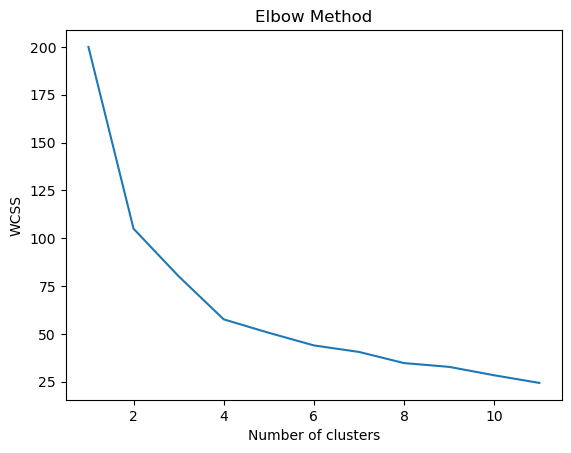

In [6]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_crime)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [42]:
clusters_new.labels_

array([3, 1, 1, 2, 1, 1, 0, 0, 1, 3, 0, 4, 1, 2, 4, 2, 2, 3, 4, 1, 0, 1,
       4, 3, 1, 2, 2, 1, 4, 0, 1, 1, 3, 4, 0, 2, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 2, 0, 4, 4, 2])

In [44]:
crime['clusterid_new'] = clusters_new.labels_

In [45]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.63817386, -0.38827513,  0.88223651, -0.27797516],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.15956455, -0.44557535, -0.39437496, -0.32460067],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445]])

In [46]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_5724\1392695126.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.036364,138.727273,78.181818,18.654545
1,1,10.815385,257.384615,76.000000,33.192308
2,2,7.100000,134.000000,59.888889,18.222222
3,3,14.671429,251.285714,54.285714,21.685714
4,4,2.680000,70.100000,51.000000,10.910000


In [47]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [48]:
centroids = clusters_new.cluster_centers_

In [49]:
ulabel=np.unique(clusters_new.labels_)

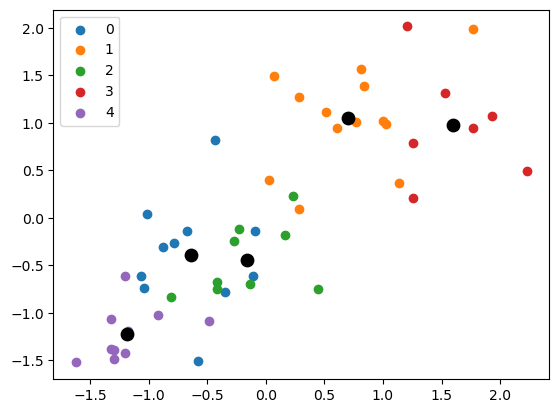

In [50]:
for i in ulabel:
    plt.scatter(scaled_crime[clusters_new.labels_ == i , 0] , scaled_crime[clusters_new.labels_ == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [51]:
#Model score
clusters_new.inertia_

50.33327385184907

<Axes: xlabel='clusterid_new', ylabel='Region'>

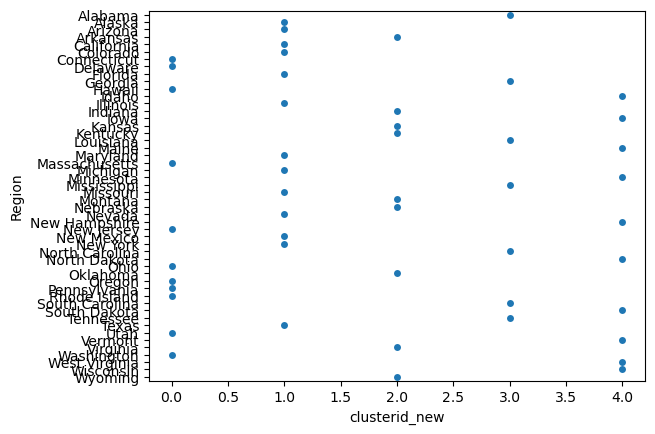

In [59]:
crime.rename(columns={'Unnamed: 0': 'Region'}, inplace=True)
sn.swarmplot(data=crime, x="clusterid_new", y="Region")

<Axes: xlabel='clusterid_new', ylabel='UrbanPop'>

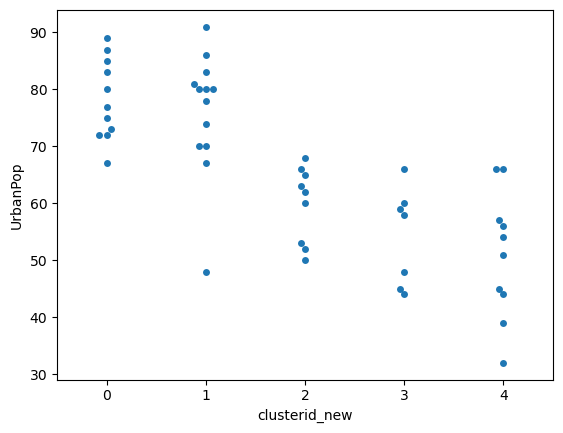

In [60]:
sn.swarmplot(data=crime, x="clusterid_new", y="UrbanPop")

<Axes: xlabel='clusterid_new', ylabel='Murder'>

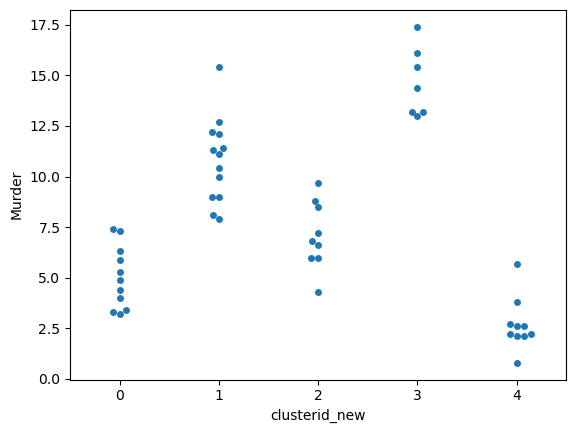

In [61]:
sn.swarmplot(data=crime, x="clusterid_new", y="Murder")

<Axes: xlabel='clusterid_new', ylabel='Assault'>

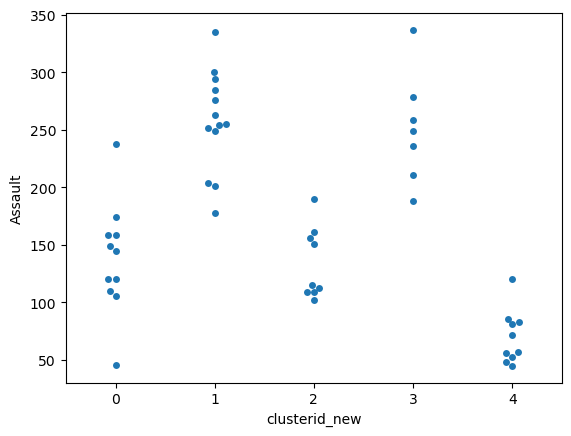

In [62]:
sn.swarmplot(data=crime, x="clusterid_new", y="Assault")

<Axes: xlabel='Murder', ylabel='Rape'>

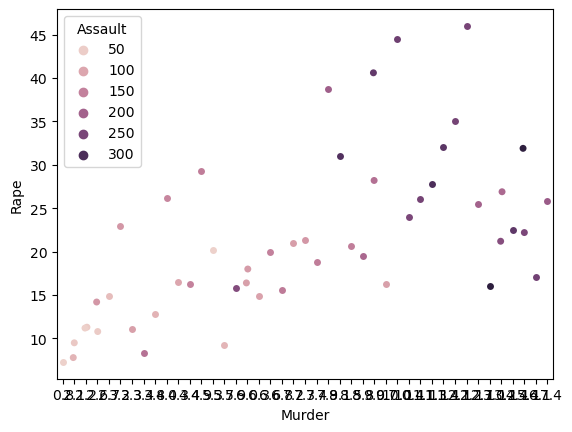

In [67]:
sn.stripplot(data=crime, x="Murder", y="Rape", hue="Assault")

<Axes: >

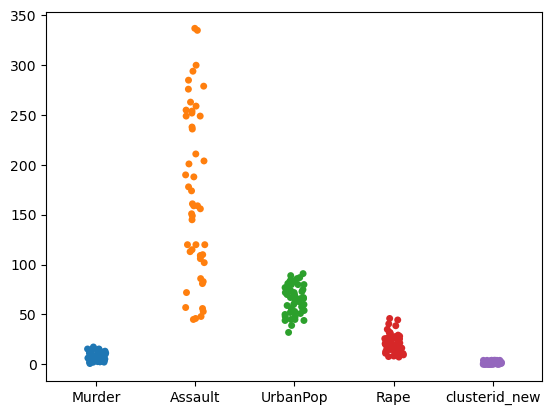

In [69]:
sn.stripplot(data=crime)